<center>
    <h1> INF285 - Computación Científica </h1>
    <h2> Tarea 4</h2>
    <h2> [S]cientific [C]omputing [T]eam </a> </h2>
    <h2> Version: 1.00</h2>
</center>

# Librerías (no utilizar liberías adicionales)

In [1]:
import numpy as np
import scipy as sp
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from ipywidgets import interact
from ipywidgets import FloatSlider, IntSlider

# Definiciones iniciales (no modificar)

In [2]:
# Función 'sigmoidal'.
s = lambda x: x/(1+np.abs(x))

# Función 'sigmoidal' modificada para considerar el efecto de cercanía. Repulsión si 'dx' es pequeño,
# y efecto de Atracción de partículas alejadas si 'df' es distinto de 0.
st = lambda df,dx: s(df)*np.abs(s(dx))-np.sign(dx)*(1-np.abs(s(dx)))

# Función de prueba 'f(x)' a la cual se le buscará los 'mínimos', es decir, el terreno.
f = lambda x: np.sin(2*x)+2*x/(1+2*np.power(x,2))
fp = lambda x: 2*np.cos(2*x)+2/(1+2*np.power(x,2))-8*np.power(x,2)/np.power(1+2*np.power(x,2),2)

# Función que grafica el comportamiento de las ovejas que quieren comer.
def NumericalSimulationNBodyProblem1(n=2,T=10,alpha=1.0,t=0):
    # Definiciones de parámetros
    x0 = np.linspace(-2,2,n)
    m = T*10
    ts = np.linspace(0,T,m)
    
    # Resolución numérica de los tres casos
    sol = solve_ivp(Nbody, t_span=[0, T], y0=x0, t_eval=ts, args=(n,alpha))

    # Gráficos
    plt.figure(figsize=(16,8))

    # Gráfica de la dinámica de las partículas.
    plt.subplot(122)
    for k in np.arange(n):
        plt.plot(sol.t,sol.y[k],'--')
    plt.plot(0*x0,x0,'k.',markersize=10)
    plt.xlabel('$t$',fontsize=20)
    plt.ylabel('$x$',fontsize=20)
    plt.title('Trayectoria de ovejas en el tiempo',fontsize=20)
    plt.grid(True)

    # Grafica de la función a minimizar y su derivada
    plt.subplot(121)
    min_x = np.min(sol.y)
    max_x = np.max(sol.y)
    xs = np.linspace(min_x,max_x,1000)
    plt.plot(xs,f(xs),label='$f(x)$')
    plt.plot(xs,fp(xs),label='$f\'(x)$')
    k = np.argmin(np.abs(sol.t-t))
    xt = sol.y[:,k]
    plt.plot(xt,f(xt),'md',label='Ovejas en el tiempo $t$',markersize=10)
    plt.plot(xt,0*xt,'k.',markersize=10)
    plt.plot(xs,0*xs,'k-',alpha=0.5)
    plt.xlabel('$x$',fontsize=20)
    plt.legend(loc='best',fontsize=20)
    plt.grid(True)
    
    plt.show()
    
    
# Función que grafica el comportamiento de las ovejas que quieren dormir.
def NumericalSimulationNBodyProblem2(n=2,T=10,alpha=1.0,t=0):
    # Definiciones de parámetros
    x0 = np.linspace(-2,2,n)
    m = T*10
    ts = np.linspace(0,T,m)
    
    # Resolución numérica de los tres casos
    sol = solve_ivp(Nbody_sleep, t_span=[0, T], y0=x0, t_eval=ts, args=(n,alpha))

    # Gráficos
    plt.figure(figsize=(16,8))

    # Gráfica de la dinámica de las partículas.
    plt.subplot(122)
    for k in np.arange(n):
        plt.plot(sol.t,sol.y[k],'--')
    plt.plot(0*x0,x0,'k.',markersize=10)
    plt.xlabel('$t$',fontsize=20)
    plt.ylabel('$x$',fontsize=20)
    plt.title('Trayectoria de ovejas en el tiempo',fontsize=20)
    plt.grid(True)

    # Grafica de la función a minimizar y su derivada
    plt.subplot(121)
    min_x = np.min(sol.y)
    max_x = np.max(sol.y)
    xs = np.linspace(min_x,max_x,1000)
    plt.plot(xs,f(xs),label='$f(x)$')
    plt.plot(xs,fp(xs),label='$f\'(x)$')
    k = np.argmin(np.abs(sol.t-t))
    xt = sol.y[:,k]
    plt.plot(xt,f(xt),'md',label='Ovejas en el tiempo $t$',markersize=10)
    plt.plot(xt,0*xt,'k.',markersize=10)
    plt.plot(xs,0*xs,'k-',alpha=0.5)
    plt.xlabel('$x$',fontsize=20)
    plt.legend(loc='best',fontsize=20)
    plt.grid(True)
    
    plt.show()

# Consultas

* Enviar a: **tareas.inf285@gmail.com**
* Se recibirán consultas en dos bloques. El primer bloque será desde las 08:00 hrs hasta las 10:00 hrs, donde todas las preguntas recibidas dentro de este bloque se responderán con seguridad a partir de las 10:01 hrs. El segundo bloque de consultas será desde las 10:01 hrs hasta las 14:00 hrs, donde las preguntas recibidas dentro de este bloque horario se responderán con seguridad a partir de las 14:01 hrs.

# Contexto

## Sheep Swarm Optimization

Particle Swarm Optimization (PSO) es un algoritmo de optimización basado en el comportamiento social de conglomerados de animales. El algoritmo utiliza una población de soluciones candidatas llamadas "partículas", que se mueven a través del espacio de búsqueda en función de su propia experiencia y la mejor experiencia global encontrada hasta el momento.

Cada partícula tiene una posición y velocidad en el espacio de búsqueda, y su movimiento se guía por dos influencias principales: su propia mejor posición histórica y la mejor posición histórica de toda la población. Estas influencias ayudan a las partículas a converger hacia las soluciones óptimas en el espacio de búsqueda.

Para el Sheep Swarm Optimization (SSO) consideramos que existe un conglomerado de ovejas que busca encontrar en un terreno puntos locales con la menor altura, pues allí el pasto es más tierno, es decir, se busca encontrar los puntos mínimos de una función "terreno". Se debe considerar también que a las ovejitas les interesa encontrar multiples puntos para pastar, por lo que se deben repeler lo más que puedan entre sí cuando se encuentren muy cerca de otras. El terreno es amplio, se debe abarcar lo más posible.

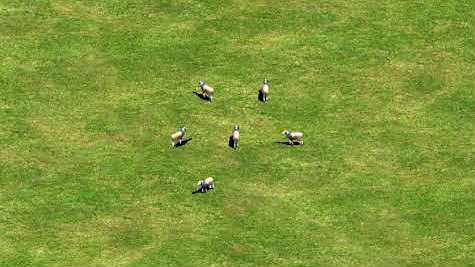
<center>Créditos: Age of Empires II</center>

# Parte 1: (25 puntos) ¿Hacia dónde meee-dirijo?

Las ovejas han encontrado una forma de moverse muy peculiar. 
Consiste en tomar en cuenta, ponderadamente, su propio ritmo y los balidos de sus amigas para encontrar el mejor lugar para pastar. 
Este movimiento se puede modelar de la siguiente manera:

$$
\dot{x}_i = -\alpha *s(f'(x_i)) + (1-\alpha)\,\frac{1}{n-1}\sum_{\substack{k=1 \\ k\neq i}}^{n} \tilde{s}(f(x_i) - f(x_k),x_i-x_k)  \frac{\text{sign}(x_i-x_k)  |x_i-x_k|}{|x_i-x_k|^2+1}
$$

Donde:
- $\alpha \in [0,1].$  Ponderador. Si es 1 sólo considera su propio conocimiento, si es 0 sólo escucha a sus amigas.
- $\text{sign}()$: Función signo, ver https://en.wikipedia.org/wiki/Sign_(mathematics)
- $\dot{\mathbf{x}}$: Posiciones de las ovejas, es decir es el vector $[x_1,x_2,\dots,x_n]$.
- $\dot{x}_i$: Posición de una oveja $i$, notar que existe una dependencia del tiempo $t$ pero se omite por simplicidad de notación.
- $f(x)$: Escrita en "Definiciones iniciales" como "f".
- $f'(x)$: Escrita en "Definiciones iniciales" como "fp".
- $s(x)$: Escrita en "Definiciones iniciales" como "s".
- $\tilde{s}$: Escrita en "Definiciones iniciales" como "st".

De esta forma podemos escribir un algoritmo para que las ovejas avancen sin escuchar a nadie:

In [3]:
# Simulación de 'n' partículas que busca/n el/los mínimo/s de una función de forma solitaria.
def Nbody_solitaria(t,x,n,alpha):
    """
    input(s)
    ----------
    t    : (float)  time, it will be used later (ignore it for now).
    x    : (vector) position/s.
    n    : (int)    number of sheeps.
    alpha: (float)  number that express how much a sheep cares about its own position and the position of its friends.

    output(s)
    ----------
    xdot : (vector) position of the sheep/s taking consideration its own position.
    """  
    # 1ra componente: Descenso 'acotado' al mínimo local.
    # Lo acotado se incluye al utilizar la composición con la función 'sigmoidal' s(x).
    # La idea es evitar el efecto de rápido decaimiento. las funciones sigmoidales moderan esto al aplicarse como filtro.
    xdot = -alpha*s(fp(x))        
    return xdot

Esto provoca que la/s oveja/s se quede/n en el óptimo local más cercano, ya que ninguna otra oveja le está avisando que puede/n ir a otros sectores del terreno.
Para evitar esto, ayude a completar el algoritmo para que la/s oveja/s entre/n en razón y escuche/n los bramidos de sus amigas.

## Pregunta 1.1 (25 puntos):
Complete el algoritmo, de forma vectorizada, para que tomen en consideración la componente del conglomerado. $Hint$: Revise funciones en "Definición inicial".

In [4]:
def Nbody(t,x,n,alpha):
    """
    input(s)
    ----------
    t    : (float)  time, it will be used later (ignore it for now).
    x    : (vector) position/s.
    n    : (int)    number of sheeps.
    alpha: (float)  number that express how much a sheep cares about its own position and the position of its friends.

    output(s)
    ----------
    xdot : (vector) position of the sheep/s taking consideration its own position and the position of its friends.
    """
    xdot = -alpha*s(fp(x)) 
    
    # Aquí su código para la interacción de las 'n' partículas vecinas
    for k in np.arange(n):
        # 2da componente: Obteniendo efecto de atracción/repulsión con los 'vecinos'.
        # Esto se hace de forma vectorizada.
        tmp = st(f(x)-f(x[k]),x-x[k])*(np.sign(x-x[k])*np.abs(x-x[k]))/(np.power(np.abs(x-x[k]),2)+1)
        # Al haber implementado la interacción vectorizada, se incluye el efecto
        # consigo mismo, por lo que para evitarlo, se anula esa componente.
        tmp[k] = 0
        # Acoplando el efecto de los vecinos con el promedio.
        xdot[k]+= (1-alpha)*np.sum(tmp)/(n-1)
    ##################################################################

    return xdot

# Parte 2: (40 puntos) ¡A moveee-rse!

Ya definido el sistema dinámico de las ovejitas ¡llegó el momento que lo veamos en acción!. Con el siguiente grafico interactivo usted podrá modificar:
- $n$ para establecer la cantidad de ovejas. 
- $T$ definirá el tiempo total que tienen las ovejas para moverse a lo largo del terreno. 
- $alpha$ establecerá la importancia que se le da al conocimiento personal y al de las amigas.
- $t$ mostrará en la gráfica lo que ocurre en ese determinado momento.

El grafico de la izquierda mostrará la posición de las ovejas en un determinado instante $t$, mientras que el de la derecha mostrará la trayectoria de las ovejas a lo largo de todo el tiempo $T$.

In [5]:
T_widget = IntSlider(min=10, max=200, step=10, value=10)
t_widget = FloatSlider(min=0.0, max=10.0, step=0.01, value=0.0)

def update_t_max(*args):
    t_widget.max = T_widget.value
def update_t_step(*args):
    t_widget.step = 1/(T_widget.value*10)
T_widget.observe(update_t_max, 'value')
T_widget.observe(update_t_step, 'value')


interact(NumericalSimulationNBodyProblem1,n=(2,100,1),T=T_widget,alpha=(0.0,1.0,0.01),t=t_widget)

interactive(children=(IntSlider(value=2, description='n', min=2), IntSlider(value=10, description='T', max=200…

<function __main__.NumericalSimulationNBodyProblem1(n=2, T=10, alpha=1.0, t=0)>

Note el movimiento de las ovejas al modificar las variables (los puntos negros son ayudas visuales para que quede más clara la distancia de cada oveja).

Si se consideran $n=2$ ovejas, $T=60$, $t=60$, $alpha=0.20$ note que existen dos 'mínimos locales' distintos. Si cambiamos a $n=3$, manteniendo lo demas igual, se obtienen tres 'mínimos locales' distintos.

La siguiente función obtiene las posiciones de las 'n' ovejas.

In [6]:
# Función que determina la posición final de las ovejas.
# No la modifique.
def sheep_vector(n,T,alpha,t):
    """
    input(s)
    ----------
    n    : (int)    number of sheeps.
    T    : (float)  total time.
    alpha: (float)  number that express how much a sheep cares about its own position and the position of its friends.
    t    : (float)  instant in T
    
    output(s)
    ----------
    xt   : (vector) position/s where the sheep/s ended.
    """
    x0 = np.linspace(-2,2,n)
    m = T*10
    ts = np.linspace(0,T,m)
    sol = solve_ivp(Nbody, t_span=[0, T], y0=x0, t_eval=ts, args=(n,alpha))
    k = np.argmin(np.abs(sol.t-t))
    x = sol.y[:,k]
    return x

# Estos 2 prints no descontarán puntaje. 
print(sheep_vector(n=2,T=60,alpha=0.20,t=60)) # 2 ovejas
print(sheep_vector(n=3,T=60,alpha=0.20,t=60)) # 3 ovejas

[-0.72527612  2.44415584]
[-3.98114531 -0.81172967  2.43431221]


Como ve se encontraron 2 y 3 agrupaciones de ovejas, que coincidentemente son distintas entre si. Pruebe con otra cantidad $n$ de ovejas y compare sus resultados con el gráfico interactivo. 


## Pregunta 2.1 (20 puntos):
Diseñe un algoritmo que permita obtener la cantidad de _estados estacionarios_ distintos que encontraron las ovejas al terminar su jornada.

In [7]:
# Función que encuentra 'n' grupos de puntos distintos en el terreno.
def n_minimos(x, epsilon):
    """
    input(s)
    ----------
    x      : (vector) size n, position of 'n' sheeps.
    epsilon: (float)  maximum distance between points to belong to the same group.

    output(s)
    ----------
    group  : (int)    number of clusters.
    """
    
    # Aquí su código para obtener cantidad de puntos disntintos
    group = 1
    xt= np.sort(x, axis = None)
    for i in np.arange(len(x)):
        if i+1==len(x):
            break
        a = np.abs(xt[i]-xt[i+1])
        if a>epsilon:
            group+=1
    ###########################################################
    
    return group

In [8]:
# Pruebe su código aquí, modifique las variables en el gráfico interactivo y verifique si su respuesta coincide con lo que ve.
xt = sheep_vector(n=30,T=80,alpha=0.27,t=80)
n_minimos(xt, epsilon=0.1)

3

## Pregunta 2.2 (20 puntos):
Si se tienen $n = 10$ ovejas, tiempo total $T = 60$ ¿Cuál es el valor de $alpha$ que ayuda a que las ovejas encuentren tres grupos? Diseñe un algoritmo para encontrar ese valor con dos decimales de precisión. Considere $epsilon=1$.

In [9]:
def alpha_3min(n=10, T=60, t=60):
    """
    input(s)
    ----------
    n    : (vector) number of sheeps.
    T    : (float)  total time.
    t    : (float)  instant in T.

    output(s)
    ----------
    alpha: (float)  coefficient.
    """
    
    # Aquí su código
    grilla = np.linspace(0,1,101)
    for i in grilla:
        xt = sheep_vector(n=10,T=60,alpha=i,t=60)
        n = n_minimos(xt, epsilon=1)
        if n == 3:
            alpha = i
    ################
    
    return alpha

In [10]:
#Pruebe aquí su código.
alpha_3min(10,60,60)

0.32

# Parte 3: (25 puntos) ¿Ya se teee-rminó la hora de comer?.

Gracias a su trabajo las ovejitas pudieron comunicarse para encontrar muchos sitios con pasto tierno. Ya están satisfechas y con ganas de irse a dormir. A ellas les gusta dormir en lo más alto del terreno, ayúdelas a volver a sus sitios favoritos para descansar.

## Pregunta 3.1 (25 puntos):
Proponga una variante del modelo que encuentre los 'máximos locales', de forma tal que las ovejitas sigan repeliendose entre sí, después de todo también les interesa encontrar varios lugares para dormir. Modifique el algoritmo de la Pregunta 1 y explique en un comentario lo que hizo para lograrlo.

In [11]:
def Nbody_sleep(t,x,n,alpha):
    """
    input(s)
    ----------
    t    : (float)  time.
    x    : (vector) position of the sheeps.
    n    : (int)    number of sheeps.
    alpha: (float)  number that express how much a sheep cares about its own position and the position of its friends.

    output(s)
    ----------
    xdot : (vector) position of the sheep/s taking consideration of its own position and the position of its friends.
    """ 
    
    # Aquí su código de la Pregunta 1 modificado. Recuerde comentar la explicación de lo modificado.
    
    # Se modifica el signo de alpha y con eso se cambia el objetivo de minimizar a maximizar.
    xdot = alpha*s(fp(x)) 
    for k in np.arange(n):
        # 2da componente: Obteniendo efecto de atracción/repulsión con los 'vecinos'.
        # Esto se hace de forma vectorizada.
        tmp = st(f(x[k])-f(x),x[k]-x)*np.sign(x[k]-x)/(np.abs(x[k]-x)+1) # *s(fp(x))
        # Al haber implementado la interacción vectorizada, se incluye el efecto
        # consigo mismo, por lo que para evitarlo, se anula esa componente.
        tmp[k] = 0
        # Acoplando el efecto de los vecinos con el promedio.
        xdot[k]+= (1-alpha)*np.sum(tmp)/(n-1)#mean(tmp)
    ################################################################################
    
    return xdot

In [12]:
interact(NumericalSimulationNBodyProblem2,n=(2,100,1),T=T_widget,alpha=(0.0,1.0,0.01),t=t_widget)

interactive(children=(IntSlider(value=2, description='n', min=2), IntSlider(value=10, description='T', max=200…

<function __main__.NumericalSimulationNBodyProblem2(n=2, T=10, alpha=1.0, t=0)>